# Setup

In [19]:
import sys
sys.path.append('../../Modules/')
sys.path.append('../../Modules/Processors from Prof')
from Packages import *
from My_Json_processor import *

# Import processors from Prof
from ipynb.fs.full.Utilities import *
from ipynb.fs.full.Json_Processor import *
from ipynb.fs.full.CSV_Processor import *

from ipynb.fs.full.Reading_Level import *
from ipynb.fs.full.Word_Processing import *
from Wordcloud import *


# Boolean

In [9]:
gemini_boolean = pd.read_csv('gemini_boolean_df.csv')
print(gemini_boolean.info())

gemini_boolean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   input          250 non-null    object
 1   target         250 non-null    bool  
 2   gemini_output  250 non-null    bool  
dtypes: bool(2), object(1)
memory usage: 2.6+ KB
None


,input,target,gemini_output
0,not ( True ) and ( True ) is,False,False
1,True and not not ( not False ) is,True,True
2,not True or False or ( False ) is,False,True
3,False or not ( True ) and False is,False,False
4,True or not False and True and False is,True,False


In [17]:
groq_boolean = pd.read_csv('groq_boolean_df.csv')
print(groq_boolean.info())
groq_boolean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   input         250 non-null    object
 1   target        250 non-null    bool  
 2   llama_output  250 non-null    object
dtypes: bool(1), object(2)
memory usage: 4.3+ KB
None


,input,target,llama_output
0,not ( True ) and ( True ) is,False,False
1,True and not not ( not False ) is,True,True
2,not True or False or ( False ) is,False,True
3,False or not ( True ) and False is,False,False
4,True or not False and True and False is,True,False


# Causal_judgement

In [15]:
gemini_causal = pd.read_csv('gemini_causal_judgement.csv')
print(gemini_causal.info())
gemini_causal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   input          187 non-null    object
 1   target         187 non-null    object
 2   gemini_output  187 non-null    object
dtypes: object(3)
memory usage: 4.5+ KB
None


,input,target,gemini_output
0,"How would a typical person answer each of the following questions about causation?\nA machine is set up in such a way that it will short circuit if both the black wire and the red wire touch the battery at the same time. The machine will not short circuit if just one of these wires touches the battery. The black wire is designated as the one that is supposed to touch the battery, while the red wire is supposed to remain in some other part of the machine. One day, the black wire and the red wire both end up touching the battery at the same time. There is a short circuit. Did the black wire cause the short circuit?\nOptions:\n- Yes\n- No",No,Yes
1,"How would a typical person answer each of the following questions about causation?\nLong ago, when John was only 17 years old, he got a job working for a large manufacturing company. He started out working on an assembly line for minimum wage, but after a few years at the company, he was given a choice between two line manager positions. He could stay in the woodwork division, which is where he was currently working. Or he could move to the plastics division. John was unsure what to do because he liked working in the woodwork division, but he also thought it might be worth trying something different. He finally decided to switch to the plastics division and try something new. For the last 30 years, John has worked as a production line supervisor in the plastics division. After the first year there, the plastics division was moved to a different building with more space. Unfortunately, through the many years he worked there, John was exposed to asbestos, a highly carcinogenic substa...",No,Yes
2,"How would a typical person answer each of the following questions about causation?\nLong ago, when John was only 17 years old, he got a job working for a large manufacturing company. He started out working on an assembly line for minimum wage, but after a few years at the company, he was given a choice between two line manager positions. He could stay in the woodwork division, which is where he was currently working. Or he could move to the plastics division. John was unsure what to do because he liked working in the woodwork division, but he also thought it might be worth trying something different. He finally decided to switch to the plastics division and try something new. For the last 30 years, John has worked as a production line supervisor in the plastics division. After the first year there, the plastics division was moved to a different building with more space. Unfortunately, through the many years he worked there, John was exposed to asbestos, a highly carcinogenic substa...",Yes,Yes
3,"How would a typical person answer each of the following questions about causation?\nMr. Wallace is highly influential in the organized crime scene. Although he commands the respect of many, there are also a number of people who stand to benefit from his death. Today, he was having lunch with one of his associates, Mr. Vincent. At one point during their meeting, Mr. Wallace left the table to go to the toilet. While he was gone, Mr. Vincent managed to slip a lethal dose of poison into his martini. The poison is known to take one hour (give or take 10 minutes, depending on the victim's body weight) to kill and would go unnoticed for the first half hour after consumption. When Mr. Wallace returned to the table, he finished his lunch and then drank the rest of his martini. The two men concluded their meeting a few minutes later. Mr. Wallace paid the bill and they both left the restaurant going in different directions. Mr. Wallace had another important business meeting about 15 minutes a...",No,Yes
4,"How would a typical person answer each of the following questions about causation?\nClaire's parents bought her an old computer. Claire uses it for schoolwork, but her brother Daniel sometimes logs on to play games. Claire has told Daniel, ""Please don't log on to my computer. If

# Disambiguation

## Get & Clean Dataset

In [21]:
gemini_disambiguation = pd.read_csv('gemini_disambiguation.csv')
gemini_disambiguation.head()

,input,target,gemini_output
0,"In the following sentences, explain the antecedent of the pronoun (which thing the pronoun refers to), or state that it is ambiguous.\nSentence: The patient was referred to the specialist because he had a rare skin condition.\nOptions:\n(A) The patient had a skin condition\n(B) The specialist had a skin condition\n(C) Ambiguous",(A),A
1,"In the following sentences, explain the antecedent of the pronoun (which thing the pronoun refers to), or state that it is ambiguous.\nSentence: The scientist collaborated with the artist, and he shared a story.\nOptions:\n(A) The scientist shared a story\n(B) The artist shared a story\n(C) Ambiguous",(C),(C)
2,"In the following sentences, explain the antecedent of the pronoun (which thing the pronoun refers to), or state that it is ambiguous.\nSentence: The developer was unable to communicate with the writer because she used big words.\nOptions:\n(A) The developer uses big words\n(B) The writer uses big words\n(C) Ambiguous",(C),(B)
3,"In the following sentences, explain the antecedent of the pronoun (which thing the pronoun refers to), or state that it is ambiguous.\nSentence: The scientist will collaborate with the artist, and he will share a story.\nOptions:\n(A) The scientist will share a story\n(B) The artist will share a story\n(C) Ambiguous",(C),(A)
4,"In the following sentences, explain the antecedent of the pronoun (which thing the pronoun refers to), or state that it is ambiguous.\nSentence: Bailey planned to meet the director at their office\nOptions:\n(A) The office was the director's office\n(B) The office was Bailey's office\n(C) Ambiguous",(C),(C)


In [ ]:
# Clean redundant characters
gemini_disambiguation['target'] = gemini_disambiguation['target'].str.replace('(',"").str.replace(')',"")
gemini_disambiguation['gemini_output'] = gemini_disambiguation['gemini_output'].str.replace('(',"").str.replace(')',"")

# Geometric_shapes

## Get & Clean Dataset

In [25]:
gemini_geometric_shapes = pd.read_csv('gemini_geomnetric_shapes.csv')
gemini_geometric_shapes.head()

,input,target,gemini_output
0,"This SVG path element <path d=""M 55.57,80.69 L 57.38,65.80 M 57.38,65.80 L 48.90,57.46 M 48.90,57.46 L 45.58,47.78 M 45.58,47.78 L 53.25,36.07 L 66.29,48.90 L 78.69,61.09 L 55.57,80.69""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle",(B),B
1,"This SVG path element <path d=""M 30.17,45.97 L 58.79,40.36 L 18.10,15.70 M 18.10,15.70 L 30.17,45.97""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle",(J),J
2,"This SVG path element <path d=""M 21.10,97.94 L 22.14,97.44 L 10.48,73.34 L 9.43,73.84 L 21.10,97.94""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle\n(K) trapezoid",(K),J
3,"This SVG path element <path d=""M 12.64,60.32 L 16.36,27.35""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle",(E),E
4,"This SVG path element <path d=""M 90.54,84.19 L 72.03,34.41 L 33.90,48.59 M 33.90,48.59 L 52.41,98.37 M 52.41,98.37 L 90.54,84.19""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle\n(K) trapezoid",(K),J


In [26]:
# Clean redundant characters
gemini_geometric_shapes['target'] = gemini_geometric_shapes['target'].str.replace('(',"").str.replace(')',"")
gemini_geometric_shapes['gemini_output'] = gemini_geometric_shapes['gemini_output'].str.replace('(',"").str.replace(')',"")

In [27]:
gemini_geometric_shapes.head()

,input,target,gemini_output
0,"This SVG path element <path d=""M 55.57,80.69 L 57.38,65.80 M 57.38,65.80 L 48.90,57.46 M 48.90,57.46 L 45.58,47.78 M 45.58,47.78 L 53.25,36.07 L 66.29,48.90 L 78.69,61.09 L 55.57,80.69""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle",B,B
1,"This SVG path element <path d=""M 30.17,45.97 L 58.79,40.36 L 18.10,15.70 M 18.10,15.70 L 30.17,45.97""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle",J,J
2,"This SVG path element <path d=""M 21.10,97.94 L 22.14,97.44 L 10.48,73.34 L 9.43,73.84 L 21.10,97.94""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle\n(K) trapezoid",K,J
3,"This SVG path element <path d=""M 12.64,60.32 L 16.36,27.35""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle",E,E
4,"This SVG path element <path d=""M 90.54,84.19 L 72.03,34.41 L 33.90,48.59 M 33.90,48.59 L 52.41,98.37 M 52.41,98.37 L 90.54,84.19""/> draws a\nOptions:\n(A) circle\n(B) heptagon\n(C) hexagon\n(D) kite\n(E) line\n(F) octagon\n(G) pentagon\n(H) rectangle\n(I) sector\n(J) triangle\n(K) trapezoid",K,J


# Hyperbaton

## Get & Clean Dataset

In [39]:
gemini_hyperbaton = pd.read_csv('gemini_hyperbaton.csv')
gemini_hyperbaton = reduntdant_characters(gemini_hyperbaton, col_names=['target', 'gemini_output'], characters=['(', ')'])

In [40]:
gemini_hyperbaton.head()

,input,target,gemini_output
0,Which sentence has the correct adjective order:\nOptions:\n(A) midsize old grey Brazilian sweater\n(B) midsize grey Brazilian old sweater,A,A
1,Which sentence has the correct adjective order:\nOptions:\n(A) rubber gray walking Mexican midsize cat\n(B) midsize gray Mexican rubber walking cat,B,A
2,Which sentence has the correct adjective order:\nOptions:\n(A) mysterious big Indian iron smoking motorcycle\n(B) big smoking mysterious Indian iron motorcycle,A,A
3,Which sentence has the correct adjective order:\nOptions:\n(A) cloth smoking rectangular motorcycle\n(B) rectangular cloth smoking motorcycle,B,A
4,Which sentence has the correct adjective order:\nOptions:\n(A) pyramidal American glass exercise surfboard\n(B) glass exercise American pyramidal surfboard,A,A


# Logical deduction five

## Get & Clean Dataset

# Logical deduction seven

## Get & Clean Dataset

# Logical deduction three

## Get & Clean Dataset

# Movie Recommendation

## Get & Clean Dataset

# Multistep arithmetic two

## Get & Clean Dataset

# Navigate

## Get & Clean Dataset

# Testing

## Processors

In [22]:
text = "This is an example text to analyze readability scores."
readability_score = textstat.flesch_reading_ease(text)
print("Flesch Reading Ease Score:", readability_score)

Flesch Reading Ease Score: 45.42


In [18]:
from ipynb.fs.full.Reading_Level import *

In [3]:
text1 = "This is an example text to analyze readability scores."
print("Flesch Reading Ease Score:", Reading_Level.compute_readability_indices(benchmark_name= "Big Bench Hard", text = text1))

Flesch Reading Ease Score: {'Flesch-Kincaid Grade': 9.2, 'Flesch-Kincaid Reading Ease': 45.42, 'GunningFog': 16.93, 'ColemanLiau': 9.94, 'ARI': 7.1, 'SMOG': 0.0, 'LIX': 53.44}


In [4]:
from ipynb.fs.full.Word_Processing import *


In [5]:
Word_Processing.split_text(text1)

['THIS',
 'IS',
 'AN',
 'EXAMPLE',
 'TEXT',
 'TO',
 'ANALYZE',
 'READABILITY',
 'SCORES']

In [6]:
Word_Processing.load_dictionary()

{'2': 1,
 '1080': 4,
 '&C': 2,
 '10-POINT': 8,
 '10TH': 4,
 '11-POINT': 8,
 '12-POINT': 8,
 '16-POINT': 8,
 '18-POINT': 8,
 '1ST': 3,
 '2,4,5-T': 7,
 '2,4-D': 5,
 '20-POINT': 8,
 '2D': 2,
 '2ND': 3,
 '30-30': 5,
 '3D': 2,
 '3-D': 3,
 '3M': 2,
 '3RD': 3,
 '48-POINT': 8,
 '4-D': 3,
 '4GL': 3,
 '4H': 2,
 '4TH': 3,
 '5-POINT': 7,
 '5-T': 3,
 '5TH': 3,
 '6-POINT': 7,
 '6TH': 3,
 '7-POINT': 7,
 '7TH': 3,
 '8-POINT': 7,
 '8TH': 3,
 '9-POINT': 7,
 '9TH': 3,
 'A': 1,
 "A'": 2,
 'A-': 2,
 'A&M': 3,
 'A&P': 3,
 'A.': 2,
 'A.A.A.': 6,
 'A.B.': 4,
 'A.B.A.': 6,
 'A.C.': 4,
 'A.D.': 4,
 'A.D.C.': 6,
 'A.F.': 4,
 'A.F.A.M.': 8,
 'A.G.': 4,
 'A.H.': 4,
 'A.I.': 4,
 'A.I.A.': 6,
 'A.I.D.': 6,
 'A.L.': 4,
 'A.L.P.': 6,
 'A.M.': 4,
 'A.M.A.': 6,
 'A.M.D.G.': 8,
 'A.N.': 4,
 'A.P.': 4,
 'A.R.': 4,
 'A.R.C.S.': 8,
 'A.U.': 4,
 'A.U.C.': 6,
 'A.V.': 4,
 'A.W.': 4,
 'A.W.O.L.': 8,
 'A/C': 3,
 'A/F': 3,
 'A/O': 3,
 'A/P': 3,
 'A/V': 3,
 'A1': 2,
 'A-1': 3,
 'A4': 2,
 'A5': 2,
 'AA': 2,
 'AAA': 3,
 'AAAA': 4,


In [10]:
gemini_boolean

,input,target,gemini_output
0,not ( True ) and ( True ) is,False,False
1,True and not not ( not False ) is,True,True
2,not True or False or ( False ) is,False,True
3,False or not ( True ) and False is,False,False
4,True or not False and True and False is,True,False
...,...,...,...
245,( not ( False ) ) or False is,True,True
246,True and not True or False and True is,False,False
247,not ( not not not not False ) is,True,True
248,True and ( not True or False ) is,False,True


In [12]:
Word_Processing.compute_word_frequency(text1)

({'THIS': 1,
  'IS': 1,
  'AN': 1,
  'EXAMPLE': 1,
  'TEXT': 1,
  'TO': 1,
  'ANALYZE': 1,
  'READABILITY': 1,
  'SCORES.': 1},
 9)

In [13]:
Word_Processing.compute_longest_words(text1)

({'READABILITY': 1}, 9)

In [14]:
from Wordcloud import *

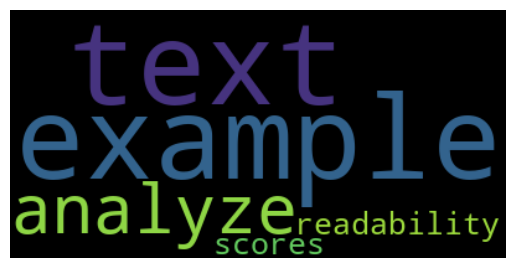

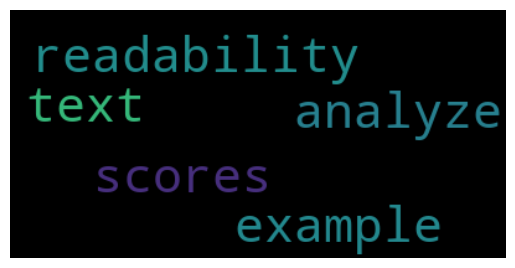

In [18]:
wc = Wordcloud()
wc.generate(text1)

## Functions

In [35]:
def reduntdant_characters(data, col_names, characters):
    for col in col_names:
        for character in characters:
            data[col] = data[col].str.replace(character,"")
    return data

In [36]:
gemini_hyperbaton = pd.read_csv('gemini_hyperbaton.csv')

In [37]:
sample = reduntdant_characters(gemini_hyperbaton, ['target', 'gemini_output'], '(')
sample = reduntdant_characters(gemini_hyperbaton, ['target', 'gemini_output'], ')')